# Workflow de Classificação: Diagnóstico de Câncer de Mama

**Aluno:** [Seu Nome]
**Projeto:** Tech Challenge - Fase 1
**Objetivo:** Desenvolver um modelo de classificação para prever se um diagnóstico é Maligno ou Benigno.

## Etapa 1: Configuração do Ambiente e Análise Estrutural

### Tarefa 1.1: Importar as bibliotecas necessárias

In [2]:
%pip install --quiet pandas numpy matplotlib seaborn scikit-learn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import warnings

# Suprime apenas FutureWarning
warnings.filterwarnings("ignore", category=FutureWarning)







In [3]:
dt = pd.read_csv('https://raw.githubusercontent.com/oakthyago/titanic_data/main/data.csv')

dt.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


### Tarefa 1.2: Carregar o conjunto de dados

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


### Tarefa 1.3: Realizar a inspeção estrutural inicial dos dados (`.shape`, `.info()`, `.head()`, `.describe()`)

In [ ]:
print("=== Informações do DataFrame ===")
print(dt.info())
print("\n=== Estatísticas Descritivas ===")
print(dt.describe())
print("\n=== ")
print(dt.shape)
print("\n=== Colunas do DataFrame ===")
print(dt.columns.tolist())


=== Informações do DataFrame ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float6

### Tarefa 1.4: Realizar a limpeza preliminar (remover colunas `id` e `Unnamed: 32`)

In [ ]:
dt = dt.drop(columns=['Unnamed: 32', 'id'])
dt.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Etapa 2: Análise Exploratória de Dados (EDA)

### Tarefa 2.1 (Análise Univariada): Analisar a distribuição da variável alvo `diagnosis`

**Análise Numérica**
O método .value_counts() é a ferramenta essencial para contar as ocorrências de cada categoria.

In [ ]:
counts = dt['diagnosis'].value_counts()
percentages = dt['diagnosis'].value_counts(normalize=True)*100

distribution_df = pd.DataFrame({
    'Contagem': counts,
    'Porcentagem': percentages.map('{:.2f}%'.format) # Formata a coluna de porcentagem
})
print("Distribuição das Classes:")
print(distribution_df)

Distribuição das Classes:
           Contagem Porcentagem
diagnosis                      
B               357      62.74%
M               212      37.26%


 **Análise Visual**
 Um gráfico de contagem (countplot) é a melhor forma de visualizar a distribuição.

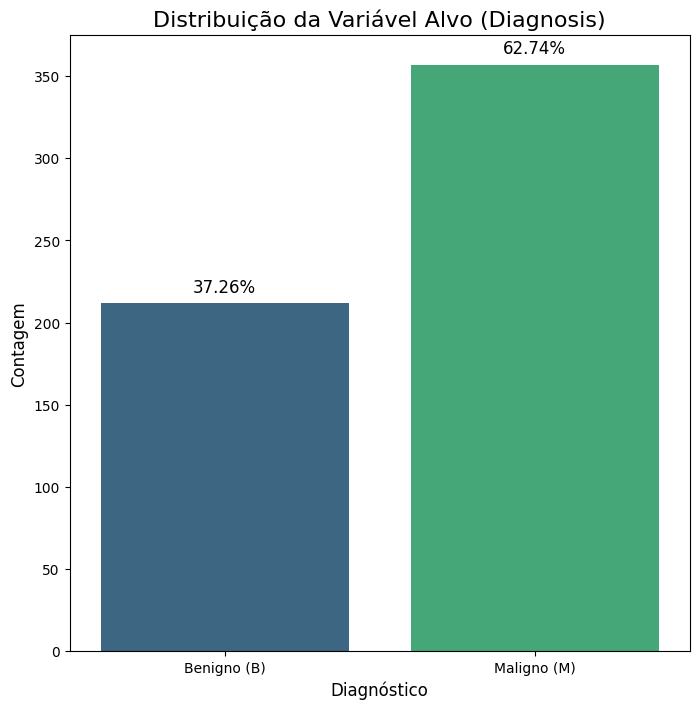

In [ ]:

plt.figure(figsize=(8, 8))

total = len(dt)
ax = sns.countplot(x='diagnosis', data=dt, palette='viridis', hue='diagnosis')
for p in ax.patches:
    count = p.get_height()
    # Calcula a porcentagem
    percentage = f'{100 * count / total:.2f}%'
    x = p.get_x() + p.get_width() / 2  # Centro da barra
    y = p.get_height()                 # Topo da barra

    # Adiciona o texto usando ax.annotate para mais controle
    ax.annotate(
        text=percentage,
        xy=(x, y),
        xytext=(0, 5), # Deslocamento vertical de 5 pontos
        textcoords="offset points",
        ha='center',
        va='bottom',
        fontsize=12
    )

# Adicionando títulos e rótulos para clareza (seu código original)
plt.title('Distribuição da Variável Alvo (Diagnosis)', fontsize=16)
plt.xlabel('Diagnóstico', fontsize=12)
plt.ylabel('Contagem', fontsize=12)
plt.xticks([0, 1], ['Benigno (B)', 'Maligno (M)'])

plt.show()

**Analise**:
- Gráfico revela um desbalanceamento de classes leve, proporção de 63%/37%
- Embora não seja um desbalanceamento extremo (como 95% vs 5%), ele tem implicações diretas e cruciais para as próximas etapas.
- Necessidade de Estratificação: Ao dividir os dados em conjuntos de treino e teste (Etapa 3.3 do workflow), é fundamental usar a estratificação (stratify=y no train_test_split). Isso garante que a proporção de 63%/37% seja mantida tanto no conjunto de treino quanto no de teste, evitando que um dos conjuntos acabe com poucos ou nenhum exemplo da classe minoritária.
- Foco em Métricas Robustas: A análise deste gráfico nos força a pensar em métricas de avaliação mais adequadas para problemas médicos, que veremos na Etapa 5:
    - Matriz de Confusão: Para ver exatamente que tipos de erros o modelo está cometendo.
    - Recall (Sensibilidade): A métrica mais importante neste contexto. Ela mede a capacidade do modelo de identificar corretamente todos os casos positivos (malignos). Queremos um Recall altíssimo para a classe 'Maligno'.
    - Precisão: Mede, de todos os que o modelo disse serem malignos, quantos realmente eram.
    - F1-Score: Uma média harmônica entre Precisão e Recall.

In [ ]:
dt.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Tarefa 2.2 (Análise Univariada): Analisar a distribuição das features numéricas com histogramas

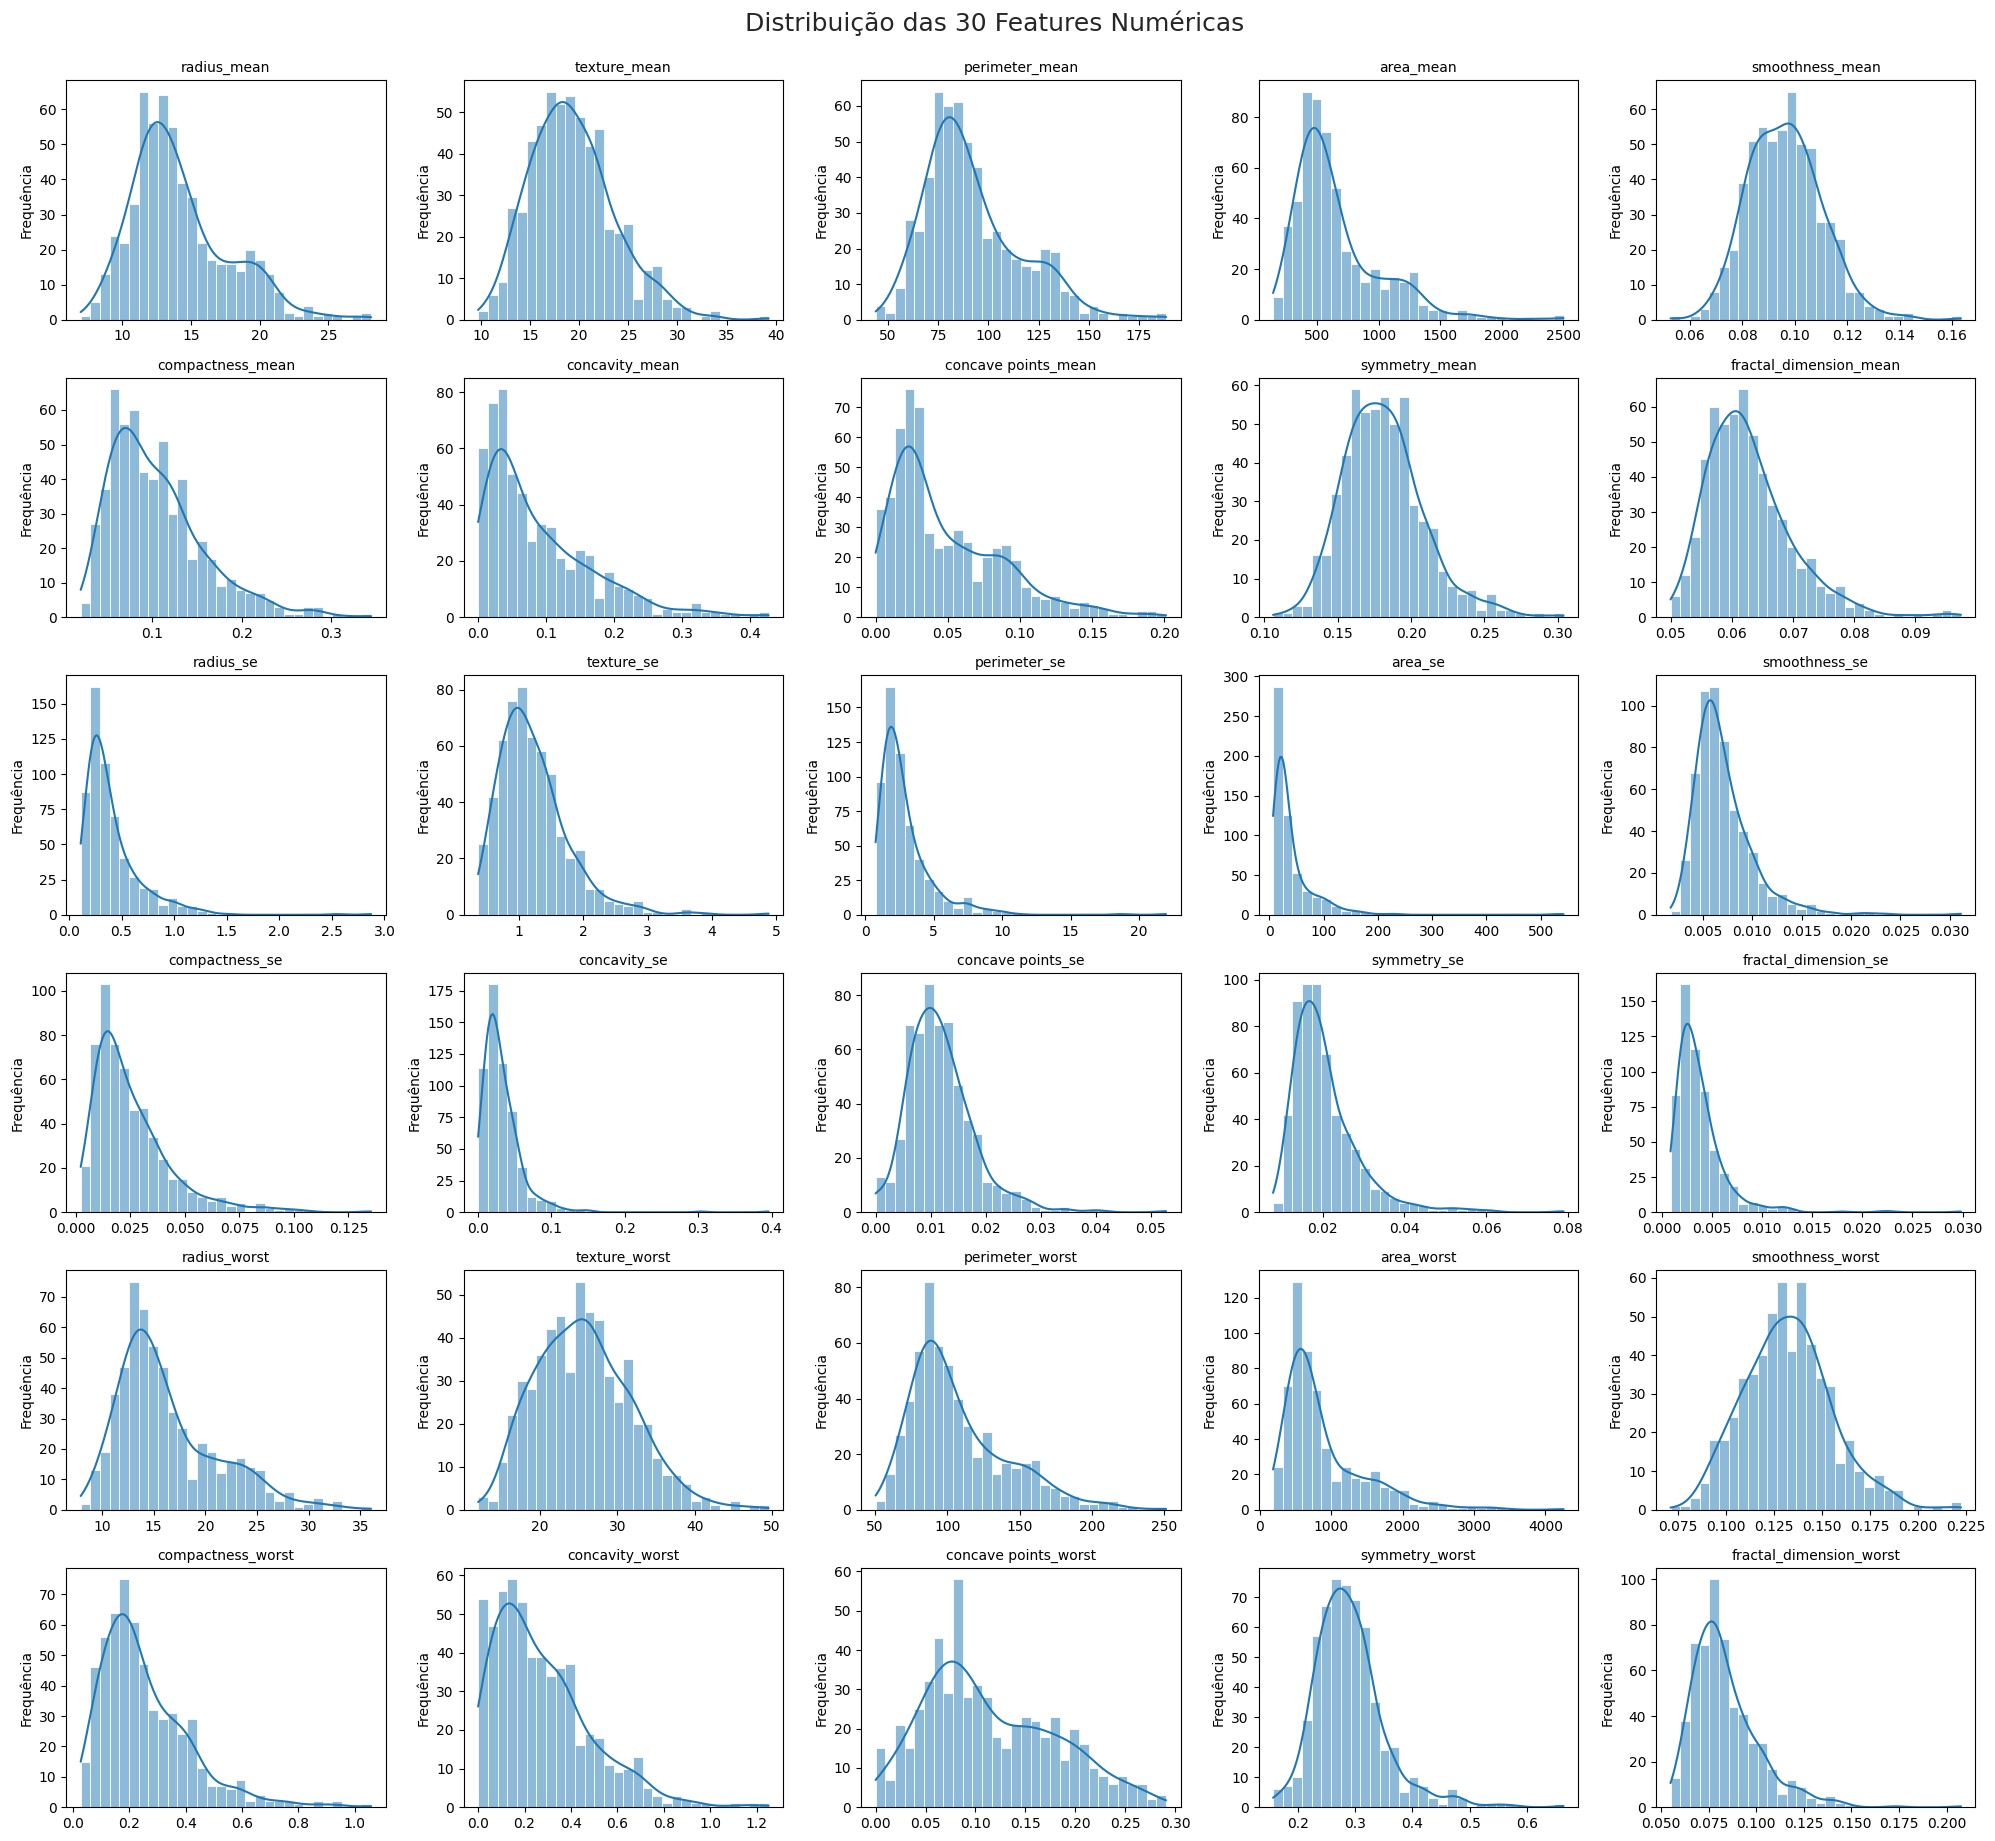

In [ ]:
# Tarefa 2.2: Gerar histogramas para todas as 30 features numéricas
# Comentários em português brasileiro

# Seleciona apenas as colunas numéricas
features_numericas = dt.select_dtypes(include=[np.number]).columns

# Cria histogramas para cada feature numérica usando programação funcional
fig, axes = plt.subplots(nrows=6, ncols=5, figsize=(20, 18))
axes = axes.flatten()
sns.set_style('whitegrid')

for idx, feature in enumerate(features_numericas):
    # Plota o histograma de cada feature
    sns.histplot(dt[feature], bins=30, ax=axes[idx], kde=True)
    axes[idx].set_title(f"{feature}", fontsize=10)
    axes[idx].set_xlabel('')
    axes[idx].set_ylabel('Frequência')

# Remove eixos não utilizados
for ax in axes[len(features_numericas):]:
    ax.set_visible(False)

plt.tight_layout()
plt.suptitle('Distribuição das 30 Features Numéricas', fontsize=18, y=1.02)
plt.show()

#### Interpretação

**Distribuições Assimétricas e Picos**
Muitas variáveis como area_mean, perimeter_mean, radius_mean, concavity_mean, compactness_mean e concave points_mean apresentam distribuições assimétricas, com picos concentrados em valores baixos e caudas longas à direita. Isso pode indicar que a maioria dos tumores tem características menos agressivas, mas há uma minoria com valores extremos que podem estar associados a casos malignos.

**Variáveis com Distribuição Quase Normal**
Variáveis como texture_mean, smoothness_mean, symmetry_mean e fractal_dimension_mean parecem ter distribuições mais simétricas, próximas de uma normal. Essas variáveis podem ser menos discriminativas isoladamente, mas úteis em combinação com outras.

**Variáveis com Baixa Variabilidade**
Algumas variáveis como fractal_dimension_se e smoothness_se têm histogramas muito estreitos, indicando baixa variabilidade. Podem ter menor poder preditivo ou exigir normalização cuidadosa para evitar viés no modelo.

**Sufixos _mean, _se, _worst**
Esses sufixos indicam diferentes aspectos da mesma característica:
 - _mean: média dos valores
 - _se: erro padrão
 - _worst: valor mais extremo observado
Os valores _worst tendem a ter distribuições mais amplas e assimétricas, sugerindo que podem ser bons indicadores de malignidade.



Esta visualização mostra a distribuição de frequência de cada uma das 30 features numéricas do seu dataset. A grande revelação aqui é que muitas features não seguem uma distribuição "normal" de sino. Essa "estranheza" na forma das distribuições é exatamente o que as torna preditivas.

A forma de cada histograma nos dá pistas sobre o quão útil aquela feature será para distinguir entre um tumor Maligno ('M') e um Benigno ('B'). Podemos agrupar as formas que vemos em três padrões principais:

- Padrão 1: Distribuição Bimodal ou Fortemente Assimétrica à Direita (As Features Mais Promissoras)

    - O que é: O gráfico tem dois picos (bimodalidade) ou um pico principal à esquerda com uma "cauda" longa se estendendo para a direita (assimetria à direita). A curva `KDE` torna isso muito visível.
        - Um modelo de Machine Learning, mesmo um simples como a Regressão Logística, podera(?) encontrar facilmente um "ponto de corte" ótimo nessas features para separar as duas classes. Por exemplo, o modelo pode aprender uma regra como: "Se `area_worst` > 1000, a probabilidade de ser maligno é alta".
    - Hipótese-Chave: Cada pico ou "lombo" na distribuição provavelmente representa uma das classes. A grande concentração de valores menores (o pico da esquerda) tende a corresponder aos tumores benignos, enquanto a cauda longa ou o segundo pico (valores maiores) tende a corresponder aos tumores malignos.
    - Observe `radius_mean`, `perimeter_mean`, `area_mean`, `concavity_mean`, `concave points_mean` e, especialmente, suas contrapartes _worst.
    - Estas são as mais evidentes.
        - `radius_mean` / `radius_worst`
        - `perimeter_mean` / `perimeter_worst`
        - `area_mean` / `area_worst`
        - Insight: A curva KDE de `area_worst` é um exemplo clássico. Ela mostra um pico principal em torno de 500-750 e um segundo "lombo" claro começando em torno de 1250. Isso sugere fortemente que tumores com área "pior" (máxima) acima de um certo limiar são muito mais propensos a serem malignos.
    - Menos evidentes, porem chama atenção
        - `concavity_mean` / `concavity_worst`
        - `concave points_mean` / `concave points_worst`
        - `compactness_mean` / `compactness_worst`
        - `texture_worst` (mostra uma bimodalidade mais sutil que a `texture_mean`, que era normal)
        - Insight: A feature `concave points_worst` é interessante. Ela tem um pico muito nítido em valores próximos de zero (provavelmente os tumores benignos que são mais "lisos") e uma distribuição muito mais espalhada e com um segundo pico sutil para valores maiores (os tumores malignos com mais "pontos côncavos").

    - Impacto no Modelo: Features com este padrão são excelentes candidatas a serem fortes preditoras. Elas indicam que existe uma diferença clara na medição entre as duas classes.

- Padrão 2: Distribuição Próxima da Normal (Simétrica)
    - O que é: O gráfico tem a clássica forma de "sino", com a maioria dos valores concentrados no centro.
        - A maioria dos valores se concentra em torno de um pico central, que representa a média e a mediana (em uma distribuição perfeitamente normal, elas são iguais).
        - A frequência dos valores diminui de forma simétrica à medida que nos afastamos do centro, para ambos os lados.
        - A curva KDE sobreposta ao histograma terá um formato de sino claro e bem definido.
    - Hipótese-Chave: Para estas características, os valores dos tumores Benignos ('B') e Malignos ('M') provavelmente não são facilmente separáveis apenas com base naquela feature.
    - Isso sugere que há uma sobreposição considerável entre as medições de ambas as classes. Por exemplo, a "textura média" (texture_mean) de um tumor benigno pode ser muito semelhante à de um tumor maligno.
    - Diferente do Padrão 1, não há um "segundo pico" ou uma "cauda longa" que possamos associar claramente a uma das classes.
    - As features que mais claramente se encaixam neste padrão são:
        - texture_mean: Este é o exemplo mais clássico no seu gráfico. A curva KDE forma um sino quase perfeito, centrado em torno de um valor de aproximadamente 19.
        - smoothness_mean / smoothness_worst: Ambas mostram uma distribuição bastante simétrica em torno de seu valor médio.
        - symmetry_mean: Também exibe um formato de sino bem definido.
        - texture_worst: Embora um pouco mais espalhada, sua distribuição geral ainda é mais simétrica do que assimétrica.

    - Olhe para **texture_mean** e **smoothness_mean**. As curvas KDE têm um formato de sino quase perfeito. Elas são simétricas.
    - Impacto no Modelo: Essas features podem ser menos preditivas individualmente, mas ainda podem ser úteis em combinação com outras. Elas são "bem-comportadas" para modelos lineares. No entanto, elas ainda podem ser muito úteis! Em um modelo multivariado (que usa todas as features), a combinação de uma feature de Padrão 2 com outras pode ajudar a refinar a decisão e a separar casos que seriam ambíguos se olhássemos apenas para as features de Padrão 1.

- Padrão 3: Distribuições com Forte Assimetria e Pico em Zero)
    - O que é: descreve as features cujos histogramas mostram uma assimetria à direita extremamente acentuada e Um pico muito agudo em valores próximos de zero, com uma cauda extremamente longa.
        - A grande maioria dos valores está "espremida" em um pico muito alto e estreito, próximo de zero.
        - A partir desse pico, uma cauda muito longa e "rasa" se estende para a direita, representando poucos casos com valores mais altos.
        - A curva KDE para este padrão se parece com uma "descida de escorregador": começa muito alta perto de zero e cai rapidamente.
    - Hipótese-Chave: Isso é típico para features que medem erro ou variabilidade (se = standard error). A maioria dos tumores tem um erro padrão pequeno, mas alguns (potencialmente os mais anômalos ou malignos) têm erros maiores.
        - A grande concentração de valores perto de zero significa que, para a maioria dos tumores (tanto 'B' quanto 'M'), a variação ou o erro padrão das medições é muito pequeno. Ou seja, a maioria das células dentro de um mesmo tumor é bastante homogênea em relação àquela característica.
        - A cauda longa à direita representa os casos mais atípicos ou heterogêneos. São tumores onde as células apresentam uma variação muito maior entre si para aquela medida específica. É razoável hipotetizar que essa alta variabilidade pode estar associada a tumores Malignos ('M').
    - Praticamente todas as 10 features da segunda "família" (com o sufixo _se) se encaixam perfeitamente neste padrão:
        - `radius_se`
        - `texture_se`
        - `perimeter_se`
        - `area_se`
        - `smoothness_se`
        - `compactness_se`
        - `concavity_se`
        - `concave points_se`
        - `symmetry_se`
        - `fractal_dimension_se`
    - Impacto no Modelo: A grande maioria dos dados está "espremida" em uma pequena faixa. Uma transformação logarítmica (np.log1p) poderia ser aplicada a essas features na Etapa 3 (Pré-processamento) para "esticar" a escala e torná-las mais fáceis para o modelo interpretar.
    - Insights - Enquanto a maioria dos tumores é internamente consistente, alguns apresentam uma alta variabilidade interna. Essa heterogeneidade (a cauda longa dos gráficos _se) pode ser, por si só, uma característica importante para identificar tumores malignos.

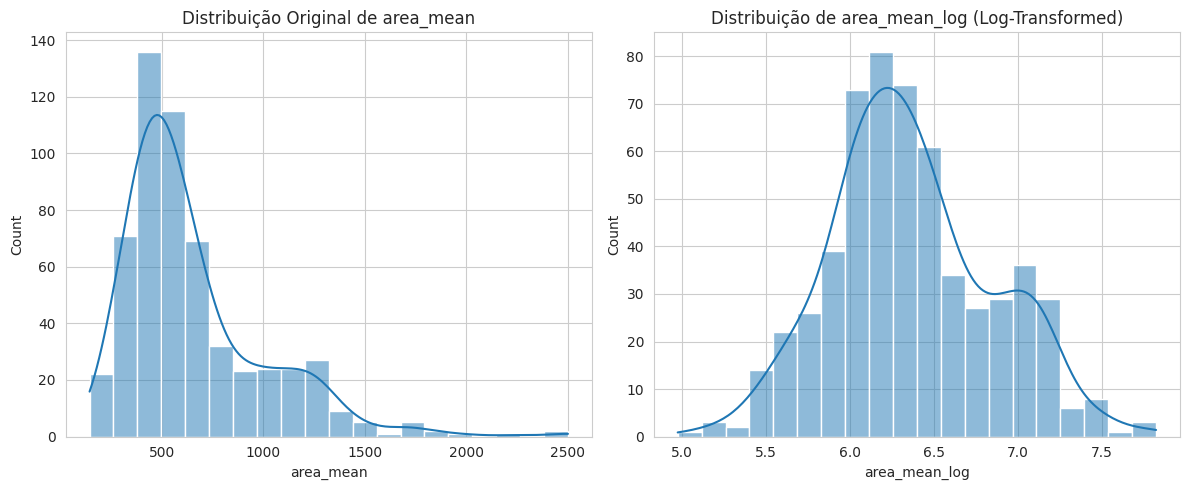

In [ ]:
import numpy as np

# Exemplo de como transformar uma feature assimétrica (ex: area_mean)
dt['area_mean_log'] = np.log1p(dt['area_mean'])

# Plotando o antes e o depois para ver o efeito
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Antes da transformação
sns.histplot(dt['area_mean'], bins=20, kde=True, ax=axes[0])
axes[0].set_title('Distribuição Original de area_mean')

# Depois da transformação
sns.histplot(dt['area_mean_log'], bins=20, kde=True, ax=axes[1])
axes[1].set_title('Distribuição de area_mean_log (Log-Transformed)')

plt.tight_layout()
plt.show()

In [ ]:
dt.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,area_mean_log
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,6.909753
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,7.190676
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,7.093405
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,5.958683
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,7.168580


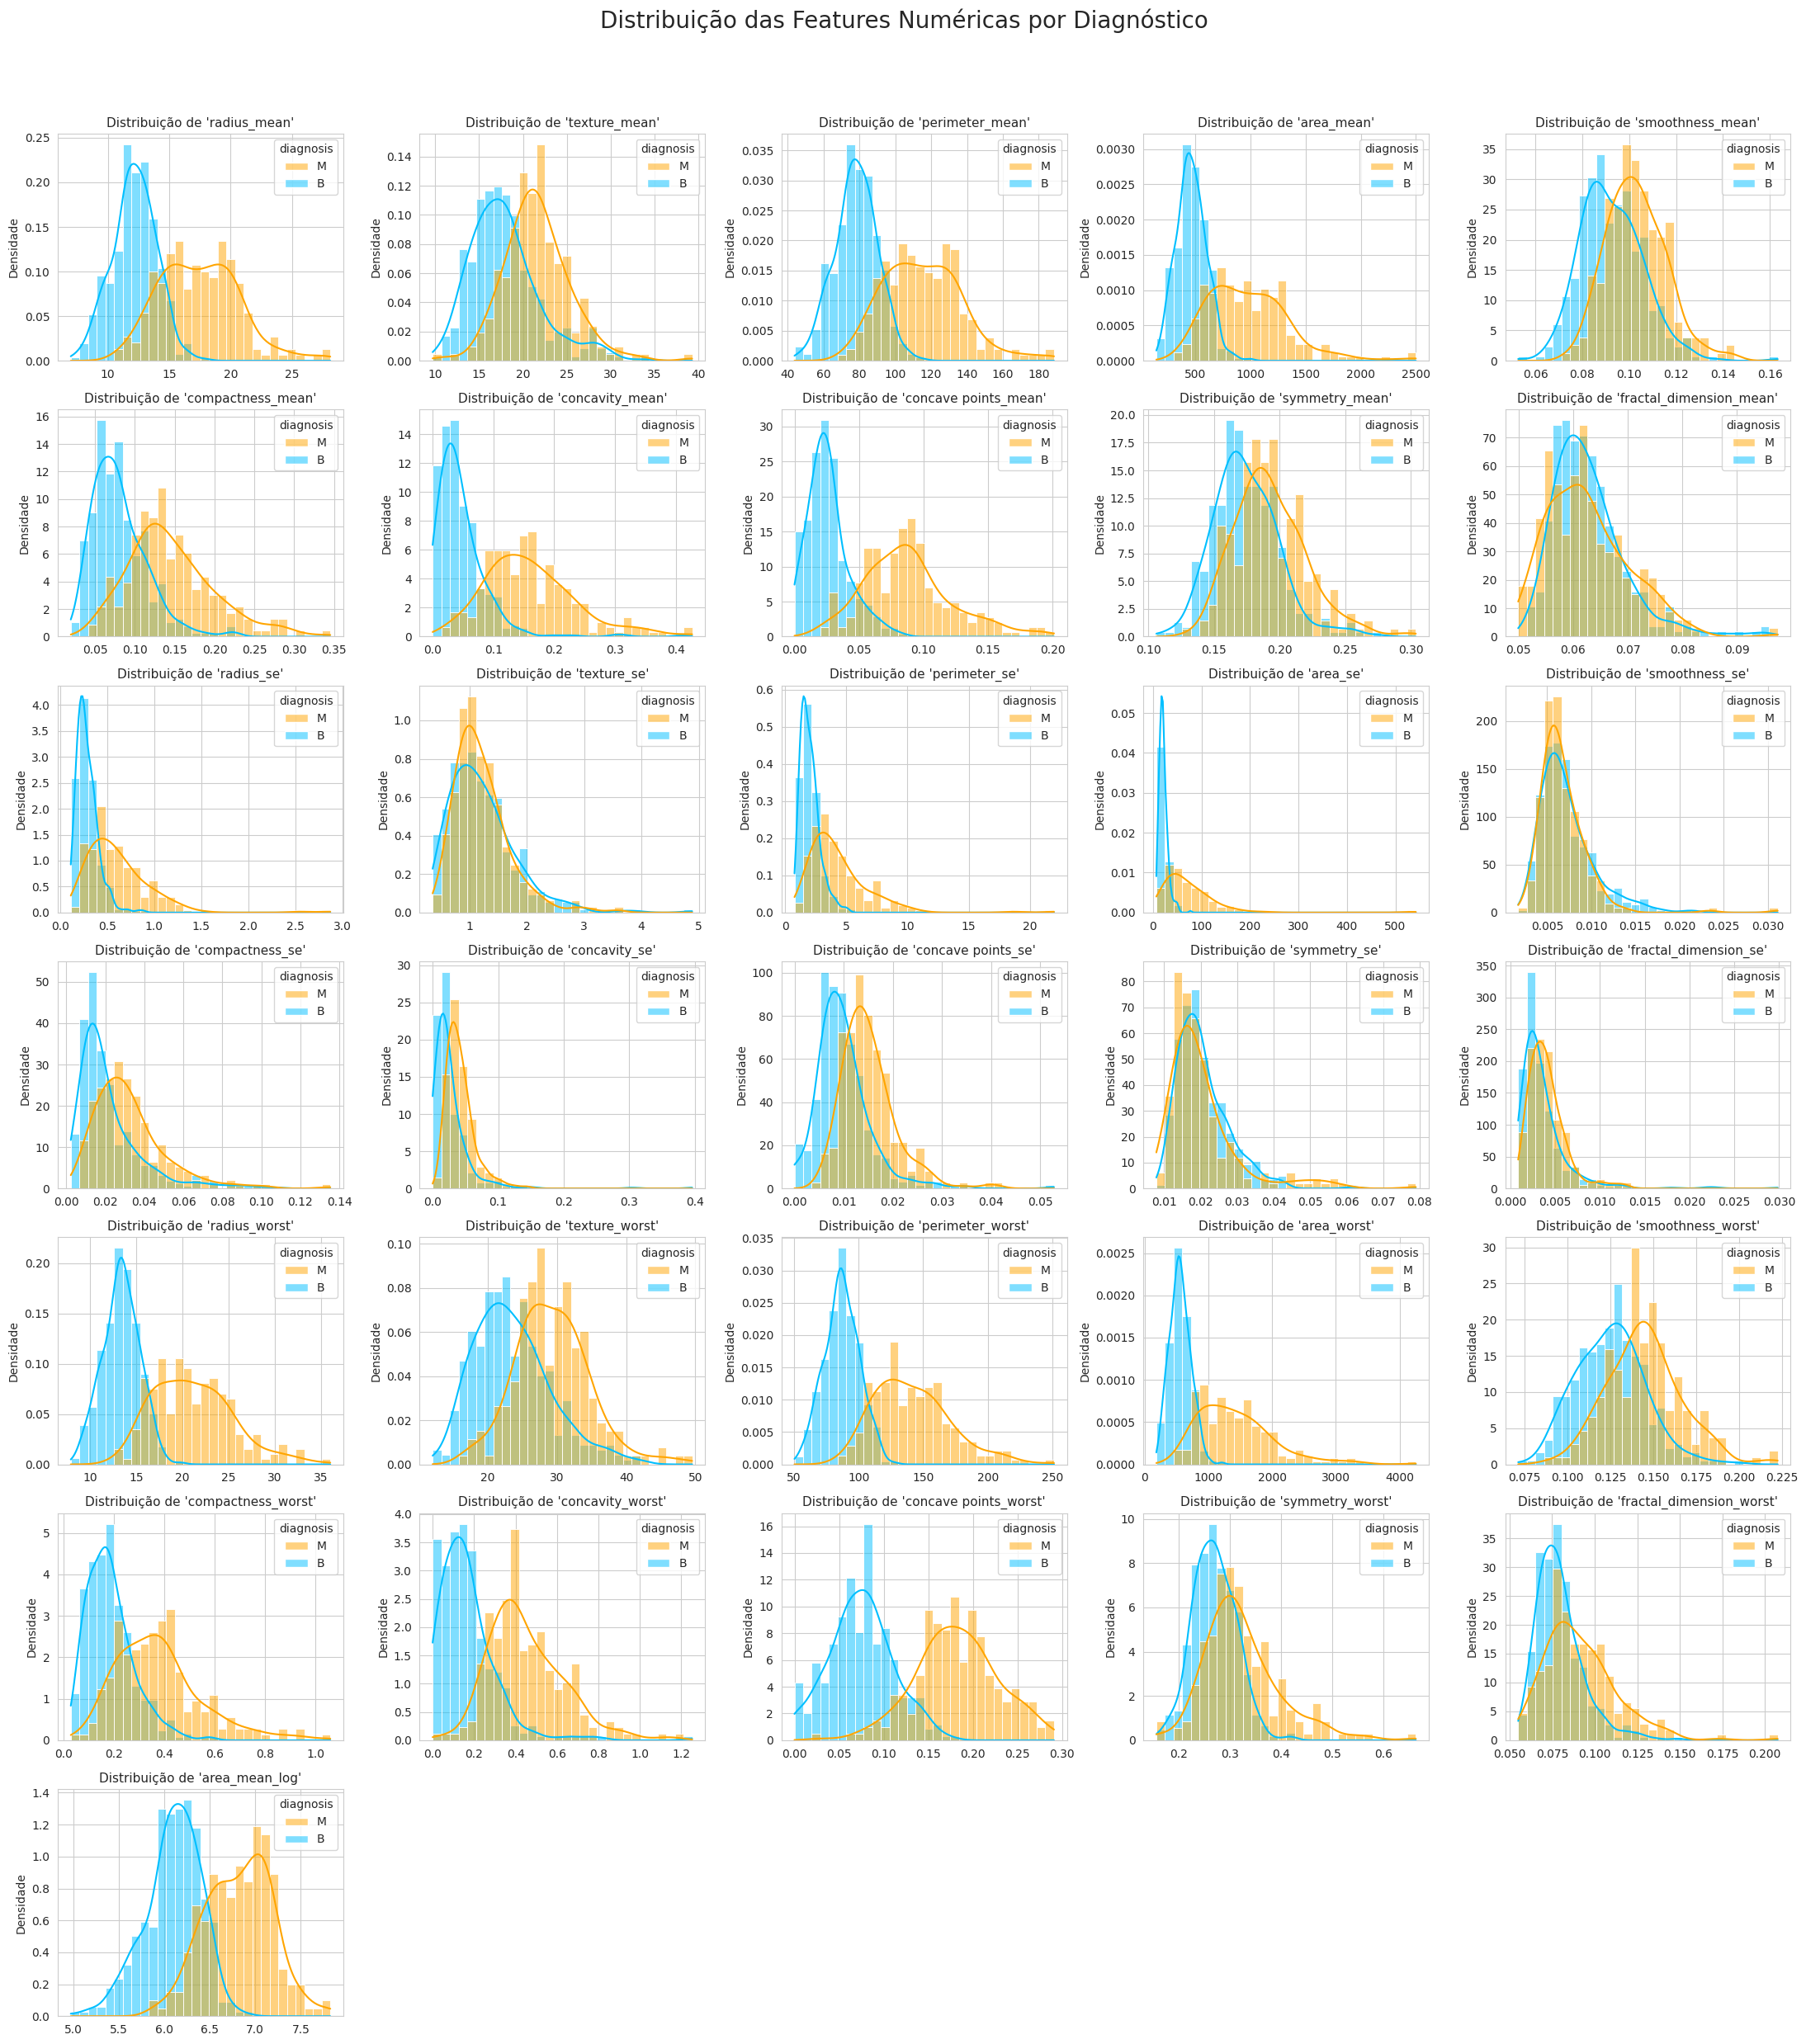

In [ ]:

# Seleciona apenas as colunas numéricas. A coluna 'diagnosis' (object) será ignorada.
features_numericas = dt.select_dtypes(include=[np.number]).columns

# Cria a figura e os eixos para os subplots
# Ajusta para 7 linhas x 5 colunas para acomodar todas as 31 features
fig, axes = plt.subplots(nrows=7, ncols=5, figsize=(22, 24))
axes = axes.flatten() # Transforma a matriz de eixos em um array 1D

# Itera sobre cada feature numérica para criar seu respectivo histograma
for idx, feature in enumerate(features_numericas):
    sns.histplot(
        data=dt,
        x=feature,
        hue='diagnosis',         # SEPARA E COLORE os dados pela coluna 'diagnosis'
        bins=30,
        ax=axes[idx],
        kde=True,
        stat='density',
        common_norm=False,
        palette={'B': 'deepskyblue', 'M': 'orange'} # Mapeia os valores 'B' e 'M' para cores
    )
    axes[idx].set_title(f"Distribuição de '{feature}'", fontsize=11)
    axes[idx].set_xlabel('')
    axes[idx].set_ylabel('Densidade')

# Remove os eixos que não foram utilizados
for ax in axes[len(features_numericas):]:
    ax.set_visible(False)

# Adiciona um título geral e ajusta o layout
plt.suptitle('Distribuição das Features Numéricas por Diagnóstico', fontsize=20, y=1.03)
plt.tight_layout(rect=[0, 0, 1, 1])
plt.show()

#### Interpretação

**Raio, Perímetro e Área**
Os casos malignos tendem a ter valores mais altos nessas três variáveis.
Isso sugere que tumores malignos geralmente são maiores e mais irregulares.

**Textura**
A distribuição é mais sobreposta, mas ainda assim os malignos mostram uma leve tendência a valores mais altos.
Pode indicar heterogeneidade maior em tecidos malignos.

**Suavidade e Simetria**
As distribuições são mais próximas entre benignos e malignos.
Menor poder discriminativo isoladamente.

**Compacidade, Concavidade e Pontos Côncavos**
Fortemente deslocados para valores maiores nos casos malignos.
São bons indicadores de irregularidade na forma do tumor.

**Dimensão Fractal**
Diferença sutil, mas ainda com tendência a valores maiores em malignos.
Pode refletir complexidade estrutural do tumor.


___

A visualização anterior nos mostrou a forma geral de cada feature, onde notamos indícios de bimodalidade (dois picos). Esta nova visualização confirma a nossa hipótese e nos mostra o porquê dessa forma: os dois picos correspondem, de fato, às distribuições distintas das classes Benigna (B) e Maligna (M). Ao sobrepor os histogramas, passamos de uma simples análise de distribuição para uma poderosa análise de separabilidade, que nos permite avaliar visualmente o poder preditivo de cada feature individualmente.


**Preditores de Alta Performance (Excelente Separação)**
Estas são as features onde as distribuições azul (Benigno) e laranja (Maligno) têm pouquíssima sobreposição. Os picos estão em locais claramente distintos, e a cauda de uma distribuição mal invade a área da outra.
Exemplos Notáveis: concave points_mean, perimeter_worst, radius_worst, area_worst, concave points_worst.
Análise Comparativa: Na análise anterior, vimos que estas features eram bimodais. Agora, confirmamos que o pico esquerdo corresponde aos tumores benignos e o pico/ombro direito, aos malignos. Os valores para tumores malignos são consistentemente mais altos.


**Preditores Moderados (Separação Razoável)**
Neste grupo, as distribuições se sobrepõem consideravelmente, mas seus picos (médias) ainda estão em locais visivelmente diferentes.
Exemplos Notáveis: texture_mean, area_se, smoothness_worst, compactness_worst.
Análise Comparativa: A texture_mean, que na análise anterior parecia quase normal, agora revela sua utilidade: embora haja muita sobreposição, a distribuição dos tumores malignos (laranja) está claramente deslocada para a direita, indicando que valores de textura mais altos são mais associados à malignidade.

**Preditores de Baixa Performance (Muita Sobreposição)**
Aqui, as distribuições azul e laranja estão quase perfeitamente uma sobre a outra. Seus picos e formas são muito semelhantes.
Exemplos Notáveis: fractal_dimension_mean, symmetry_se, smoothness_se, fractal_dimension_se.
Análise Comparativa: Estas features, que já pareciam ter baixa variabilidade na análise anterior, agora se mostram pouco úteis isoladamente.

Enquanto a primeira grade de histogramas nos mostrou a distribuição geral de cada feature, esta nova visualização vai um passo além: ela separa essa distribuição por classe, mostrando um histograma para os tumores Malignos (vermelho) e outro para os Benignos (verde), sobrepostos; quanto menor a sobreposição entre as distribuições vermelha e verde, mais preditiva é a feature. Uma separação clara entre as duas cores significa que a variável, sozinha, já é muito boa para distinguir entre um tumor maligno e um benigno.

- Padrão 1: Distribuição Bimodal ou Fortemente Assimétrica à Direita (As Features Mais Promissoras)
    - Histogramas com dois "lombos" ou uma cauda longa à direita. Nossa hipótese era que cada lombo/cauda representava uma classe. A distribuição verde (Benigno) corresponde perfeitamente ao pico principal, concentrado em valores mais baixos. A distribuição vermelha (Maligno) corresponde perfeitamente ao segundo lombo ou à cauda longa à direita, concentrada em valores mais altos.
    - Exemplo: area_worst -> A maioria esmagadora dos tumores com área < 1000 é benigna (verde). A maioria esmagadora dos tumores com área > 1000 é maligna (vermelho). A separação é muito clara. Isso nos diz que features de tamanho e forma são os preditores mais fortes.
    - Poderemos utilizar todas as features _worst relacionadas a tamanho e forma (radius_worst, perimeter_worst, area_worst, concavity_worst, concave points_worst) para prever se um tumor é Benigno ou Maligno. A separação entre as distribuições verde e vermelha é indicativa.
    
- Padrão 2: Distribuição Próxima da Normal (Simétrica)
    - Histogramas em formato de sino, sugerindo que as classes poderiam estar misturadas.  As distribuições vermelha e verde têm uma sobreposição muito maior. Embora a distribuição vermelha (M) esteja ligeiramente deslocada para a direita (indicando que tumores malignos tendem a ter, em média, valores um pouco mais altos para essas features), não há um ponto de corte claro. Muitos tumores benignos e malignos compartilham valores semelhantes para textura e suavidade.
    - Estas features são preditores mais fracos individualmente, mas a diferença nas médias ainda pode ser útil para o modelo em combinação com outras.
    - As versões _mean das mesmas features (radius_mean, etc.). A separação é clara, mas um pouco menos pronunciada que nas _worst

- Padrão 3: Distribuições com Forte Assimetria e Pico em Zero)
    - Um pico agudo em zero com uma cauda longa. Nossa hipótese era que a cauda longa representava os casos malignos, porem a distribuição verde (Benigno) está quase inteiramente concentrada no pico inicial próximo de zero. A distribuição vermelha (Maligno) é muito mais espalhada e compõe a maior parte da "cauda longa".
    - Tumores com alta variabilidade interna (erro padrão _se elevado) têm uma probabilidade muito maior de serem malignos. Esta é uma informação preditiva valiosa.

---


### Tarefa 2.3 (Análise Bivariada): Analisar a relação entre as features e a variável alvo com boxplots

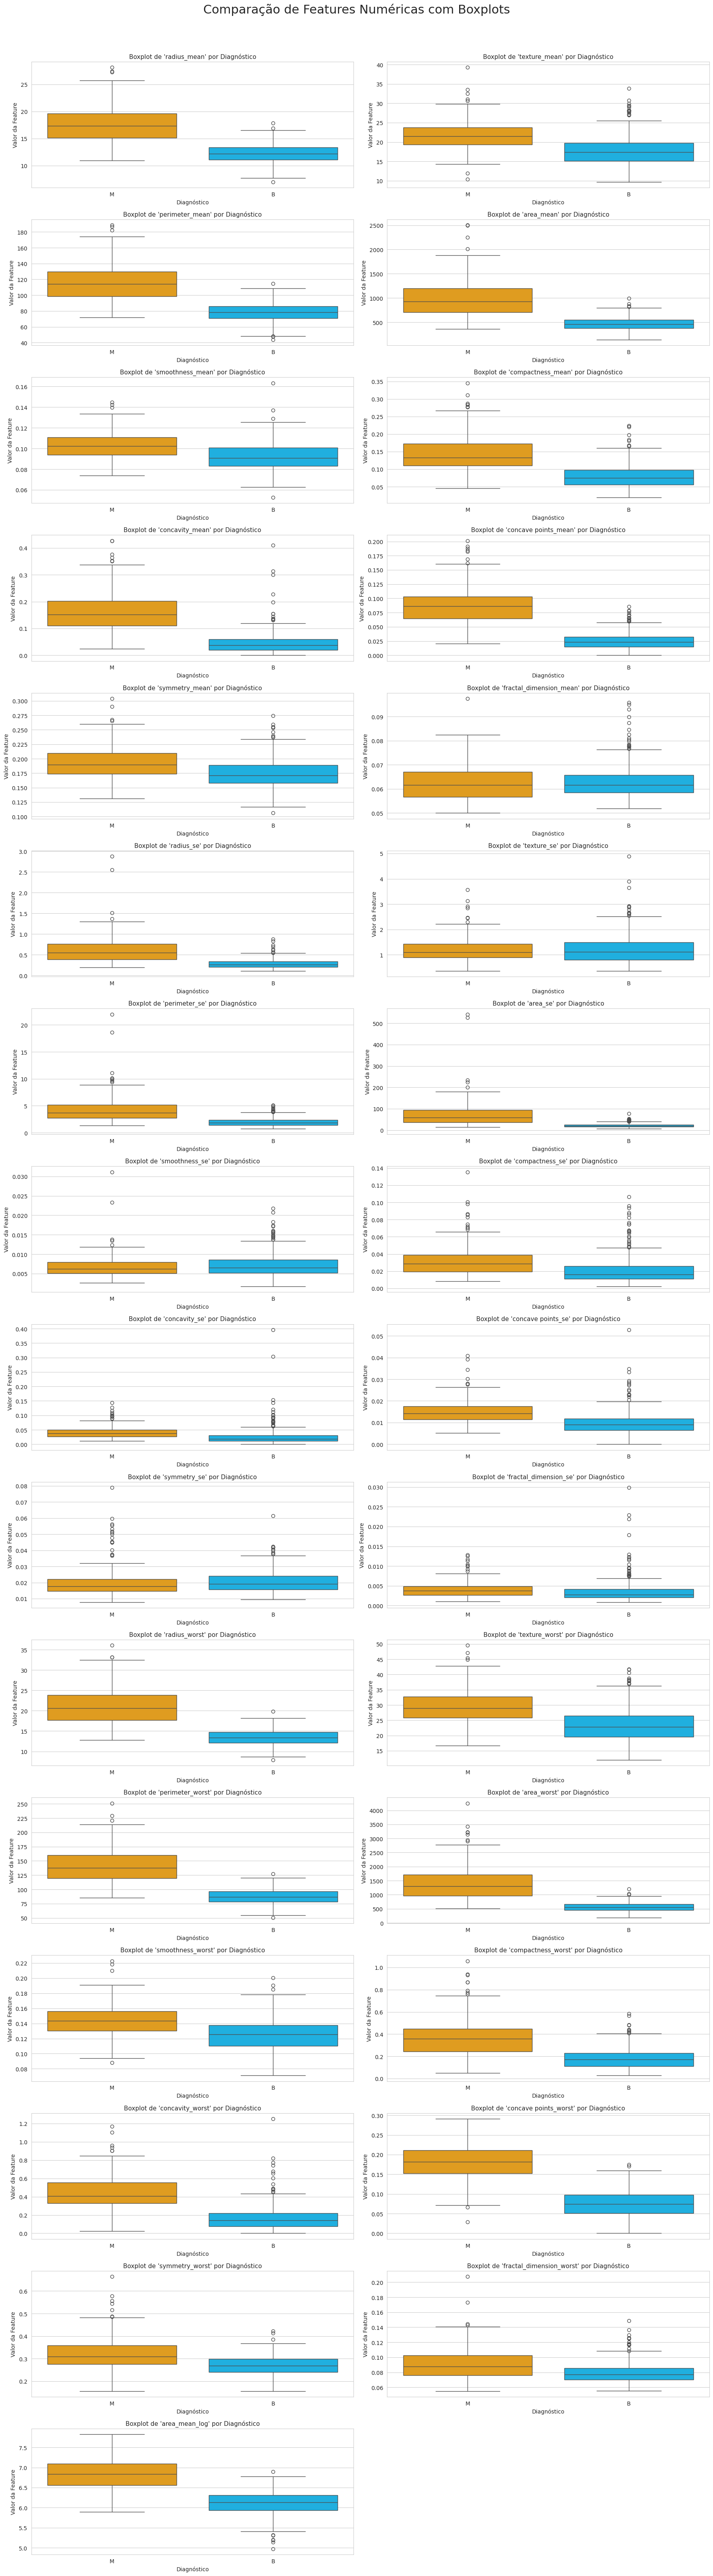

In [ ]:
features_numericas = dt.select_dtypes(include=[np.number]).columns
n_colunas = 2
n_linhas = int(np.ceil(len(features_numericas) / n_colunas))

fig, axes = plt.subplots(n_linhas, n_colunas, figsize=(18, n_linhas * 4))
axes = axes.flatten()


for idx, feature in enumerate(features_numericas):
    sns.boxplot(
        data=dt,
        x='diagnosis',
        hue='diagnosis',    # A variável categórica no eixo X cria os grupos
        y=feature,      # A variável numérica no eixo Y
        ax=axes[idx],   # Define em qual subplot desenhar
        palette={'B': 'deepskyblue', 'M': 'orange'} # Mesma paleta de cores
    )
    axes[idx].set_title(f"Boxplot de '{feature}' por Diagnóstico", fontsize=11)
    axes[idx].set_xlabel('Diagnóstico') # Rótulo do eixo X
    axes[idx].set_ylabel('Valor da Feature') # Rótulo do eixo Y

# Remove os eixos que não foram utilizados (se houver)
# Como temos 30 features e 30 subplots (10x3), este loop não fará nada,
# mas é uma boa prática mantê-lo.
for ax in axes[len(features_numericas):]:
    ax.set_visible(False)

# Adiciona um título geral e ajusta o layout
plt.suptitle('Comparação de Features Numéricas com Boxplots', fontsize=22, y=1.01)
plt.tight_layout(rect=[0, 0, 1, 1])
plt.show()

#### Interpretação

**Preditores de Alta Performance (Separação Drástica**
Estas são as features onde a caixa laranja (Maligno) e a caixa azul (Benigno) praticamente não se sobrepõem. A mediana dos tumores malignos é frequentemente maior do que o valor máximo (o topo do "bigode") dos tumores benignos.
Exemplos Notáveis: concave points_worst, perimeter_worst, radius_worst, concave points_mean, area_mean.
Análise: Para a feature concave points_worst, por exemplo, a grande maioria dos tumores benignos tem valores abaixo de 0.1, enquanto a grande maioria dos tumores malignos tem valores acima de 0.15. A separação é quase perfeita.

 **Preditores Moderados (Separação Estatística Clara)**
Neste grupo, as caixas se sobrepõem, mas suas posições (medianas) e/ou tamanhos (dispersão) são visivelmente diferentes.
Exemplos Notáveis: texture_mean, smoothness_worst, symmetry_worst.
Análise: Observe a texture_mean. Embora haja uma sobreposição considerável, a caixa laranja (M) está claramente posicionada em valores mais altos que a caixa azul (B). Isso nos diz que, estatisticamente, tumores malignos tendem a ter uma textura maior.

 **Preditores de Baixa Performance (Alta Sobreposição)**
Aqui, as caixas e as medianas estão em posições muito semelhantes, indicando que a distribuição da feature é quase idêntica para ambos os diagnósticos.
Exemplos Notáveis: fractal_dimension_se, smoothness_se.
Análise: Os boxplots para fractal_dimension_se são praticamente indistinguíveis entre si.





### Tarefa 2.4 (Análise Bivariada): Analisar a correlação entre as features numéricas com um heatmap

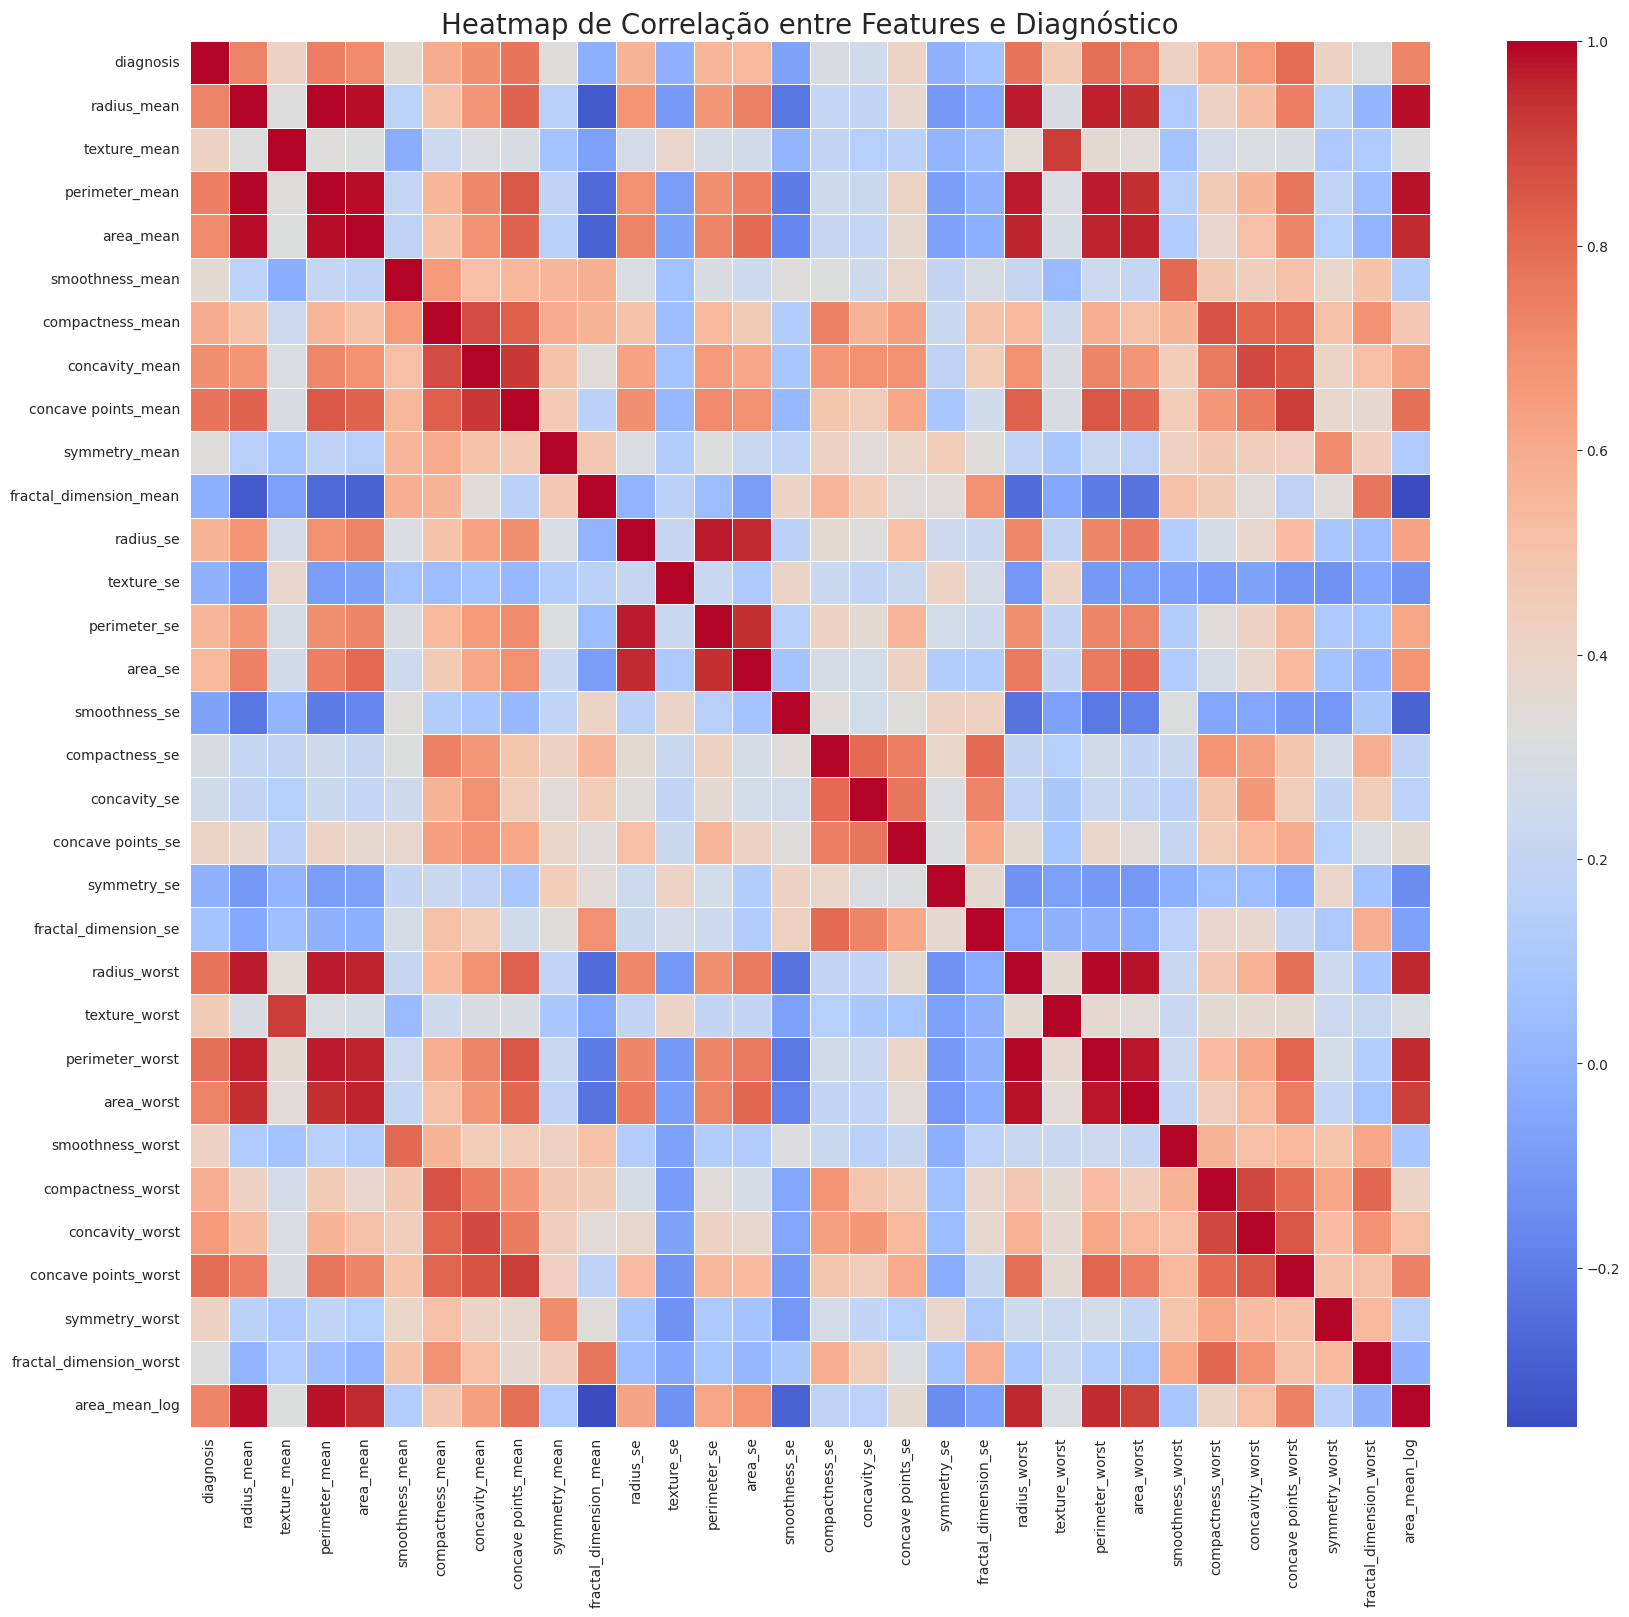

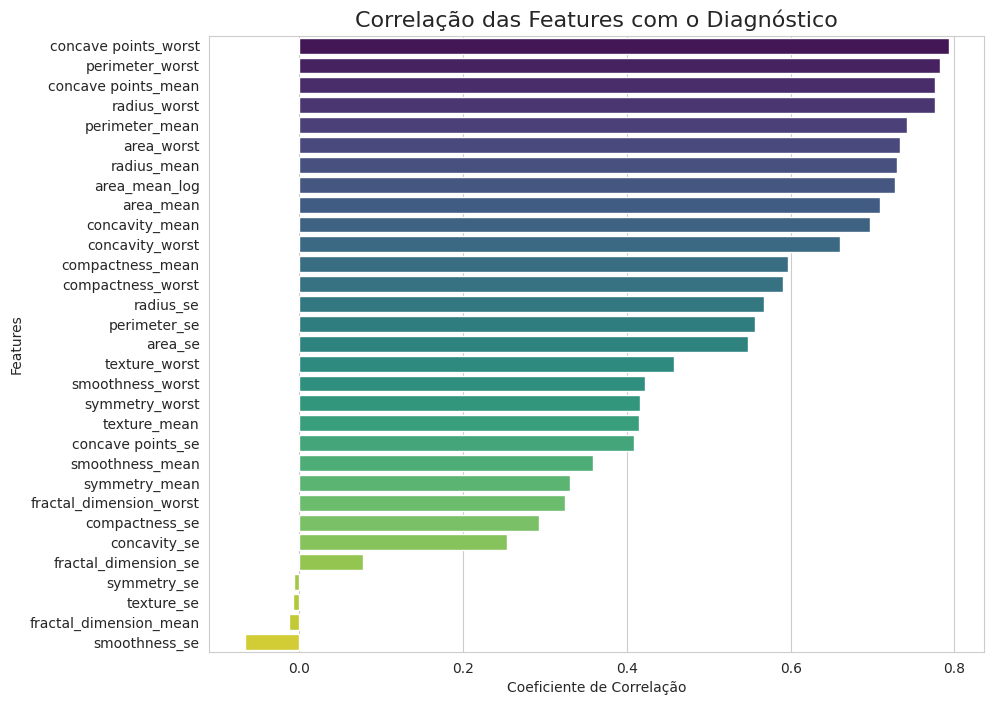

concave points_worst       0.793566
perimeter_worst            0.782914
concave points_mean        0.776614
radius_worst               0.776454
perimeter_mean             0.742636
area_worst                 0.733825
radius_mean                0.730029
area_mean_log              0.727979
area_mean                  0.708984
concavity_mean             0.696360
concavity_worst            0.659610
compactness_mean           0.596534
compactness_worst          0.590998
radius_se                  0.567134
perimeter_se               0.556141
area_se                    0.548236
texture_worst              0.456903
smoothness_worst           0.421465
symmetry_worst             0.416294
texture_mean               0.415185
concave points_se          0.408042
smoothness_mean            0.358560
symmetry_mean              0.330499
fractal_dimension_worst    0.323872
compactness_se             0.292999
concavity_se               0.253730
fractal_dimension_se       0.077972
symmetry_se               -0

In [ ]:

# 1. Criar uma cópia do DataFrame para não alterar o original
df_corr = dt.copy()

# 2. Converter a coluna 'diagnosis' para formato numérico
#    Mapeamos Maligno (M) para 1 e Benigno (B) para 0
df_corr['diagnosis'] = df_corr['diagnosis'].map({'M': 1, 'B': 0})

# 3. Calcular a matriz de correlação
#    O .corr() agora incluirá a coluna 'diagnosis'
correlation_matrix = df_corr.corr()

# 4. Gerar o heatmap
plt.figure(figsize=(20, 18))
sns.heatmap(
    correlation_matrix,
    annot=False,  # Com 31x31 colunas, as anotações seriam ilegíveis
    cmap='coolwarm', # Um bom mapa de cores para ver valores positivos (quentes) e negativos (frios)
    linewidths=.5
)
plt.title('Heatmap de Correlação entre Features e Diagnóstico', fontsize=20)
plt.show()

# 5. (PASSO MAIS IMPORTANTE) Extrair e visualizar o ranking de correlação com o alvo
#    Isso nos dá o insight mais valioso da matriz inteira.
target_correlation = correlation_matrix['diagnosis'].drop('diagnosis').sort_values(ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x=target_correlation.values, y=target_correlation.index, palette='viridis')
plt.title('Correlação das Features com o Diagnóstico', fontsize=16)
plt.xlabel('Coeficiente de Correlação')
plt.ylabel('Features')
plt.show()

print(target_correlation)

#### Interpretação

**Correlação Feature-Alvo (O Ranking dos Preditores)**
Elas confirmam numericamente o que vimos visualmente nos histogramas e boxplots.
- Preditores de Alta Performance (Correlação Forte, > 0.7):
    - Features: concave points_worst, perimeter_worst, concave points_mean, radius_worst, etc.
    - Análise: Todas estas features têm uma forte correlação positiva com o diagnóstico. Isso significa que, à medida que o valor dessas features aumenta, a probabilidade de o diagnóstico ser Maligno (mapeado para 1) também aumenta. Isso alinha-se perfeitamente com os boxplots, onde vimos que as "caixas" dos tumores Malignos estavam em posições muito mais altas para estas mesmas features.
- Preditores de Baixa Performance (Correlação Próxima de Zero):
    - Features: symmetry_se, texture_se, fractal_dimension_mean, smoothness_se.
    - Análise: Os coeficientes de correlação são quase nulos (-0.06 a 0.07). Isso indica que não há uma relação linear discernível entre estas features e o diagnóstico. Novamente, isso valida o que vimos nos gráficos anteriores, onde as distribuições para Benigno e Maligno estavam quase completamente sobrepostas.

**Correlação Feature-Feature (O Problema da Multicolinearidade)**
Agora, vamos olhar para o heatmap em si, ignorando a primeira linha/coluna (diagnosis).
- Observação: Note os grandes "quadrados" de vermelho vivo (correlação próxima de +1.0) na matriz.
Um exemplo gritante é o bloco entre radius_mean, perimeter_mean, e area_mean. Eles são quase perfeitamente correlacionados.
O mesmo padrão se repete para suas contrapartes _worst (radius_worst, perimeter_worst, area_worst).
- Análise (O "Porquê"): Isso é esperado e lógico. Raio, perímetro e área são medidas geometricamente relacionadas da mesma característica subjacente: o tamanho do tumor. Se um aumenta, os outros aumentam de forma previsível. Elas são redundantes, pois carregam essencialmente a mesma informação.

### Tarefa 2.5 (Análise Multivariada): Analisar a separabilidade das classes com PCA

In [ ]:

# 1. Separar as features (X) da variável alvo (y)
X = dt.drop(columns=['diagnosis'])
y = dt['diagnosis']

# 2. (PASSO CRUCIAL) Escalonar as features
#    O PCA funciona melhor quando todas as features têm média 0 e desvio padrão 1.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Aplicar o PCA
#    Vamos reduzir as 30 features para apenas 2 componentes principais.
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)

# 4. Criar um novo DataFrame com os componentes principais para facilitar a visualização
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
# Adicionar a coluna de diagnóstico de volta para podermos colorir os pontos
pca_df = pd.concat([pca_df, y], axis=1)






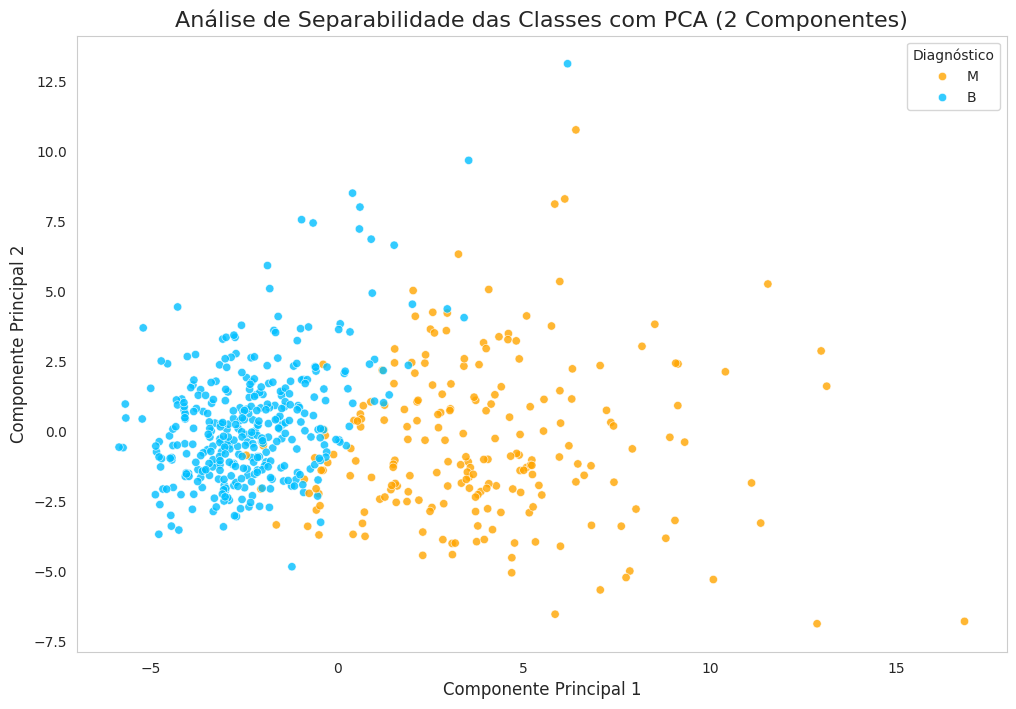

Variância explicada por PC1: 44.81%
Variância explicada por PC2: 19.36%
Variância total explicada pelos 2 componentes: 64.17%


In [ ]:

# 7. Visualizar o resultado
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x='PC1',
    y='PC2',
    hue='diagnosis',
    data=pca_df,
    palette={'B': 'deepskyblue', 'M': 'orange'},
    alpha=0.8
)

plt.title('Análise de Separabilidade das Classes com PCA (2 Componentes)', fontsize=16)
plt.xlabel('Componente Principal 1', fontsize=12)
plt.ylabel('Componente Principal 2', fontsize=12)
plt.legend(title='Diagnóstico')
plt.grid()
plt.show()

# (Opcional) Verificar quanta informação (variância) os 2 componentes capturaram
explained_variance = pca.explained_variance_ratio_
print(f"Variância explicada por PC1: {explained_variance[0]:.2%}")
print(f"Variância explicada por PC2: {explained_variance[1]:.2%}")
print(f"Variância total explicada pelos 2 componentes: {np.sum(explained_variance):.2%}")

#### Interpretação

**PC1 (Primeiro Componente Principal):**
É a combinação linear das variáveis originais que captura a maior parte da variância dos dados.
→ No caso, PC1 sozinho explica 44,81% da variabilidade total do dataset.

**PC2 (Segundo Componente Principal):**
É a segunda combinação linear, ortogonal (independente) de PC1, que captura a segunda maior parte da variância.
→ Aqui, PC2 explica 19,36% da variância.

**Variância total**
A variância total explicada pelos dois primeiros componentes (PC1 + PC2) é 64,17%.
Isso quer dizer que, ao projetar os dados em apenas duas dimensões, você ainda está mantendo mais da metade da informação original do dataset.



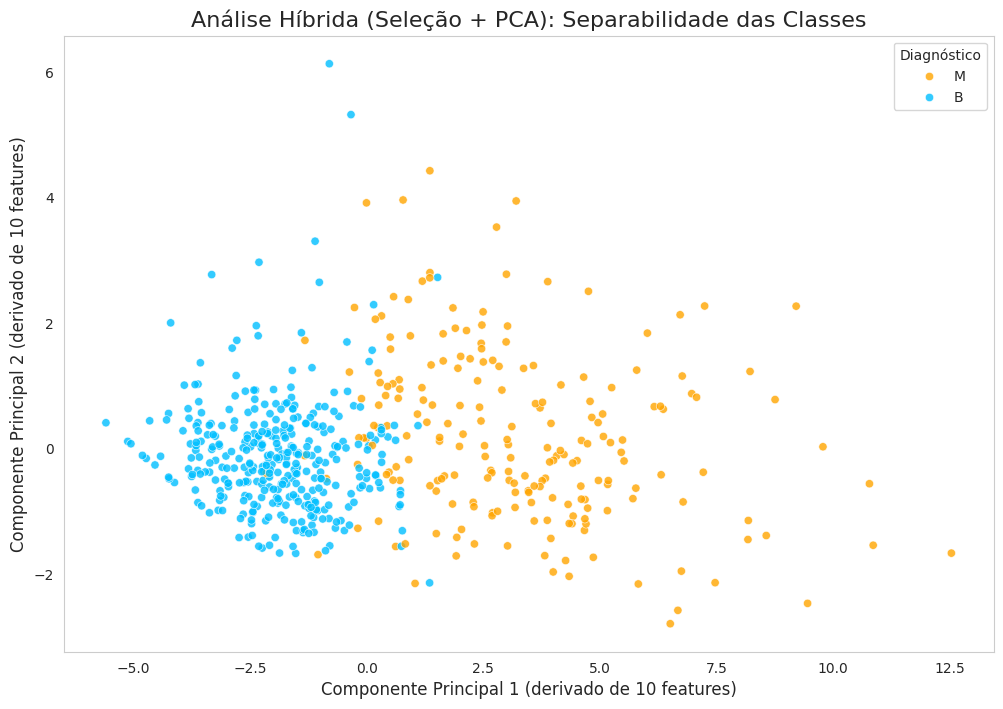

Variância explicada por PC1_hybrid: 84.44%
Variância explicada por PC2_hybrid: 11.03%
Variância total explicada pelos 2 componentes: 95.47%


In [ ]:

# 1. (FILTRO) Selecionar as features mais correlacionadas. corr > 0.6
features_selecionadas = [
'concave points_worst',
'perimeter_worst',
'concave points_mean',
'radius_worst',
'perimeter_mean',
'area_worst',
'radius_mean',
'area_mean_log',
'area_mean',
'concavity_mean',
'concavity_worst'
]
X_selected = dt[features_selecionadas]
y = dt['diagnosis'] # A variável alvo permanece a mesma

# 2. Escalonar APENAS as features selecionadas
scaler_hybrid = StandardScaler()
X_selected_scaled = scaler_hybrid.fit_transform(X_selected)

# 3. (CONDENSAÇÃO) Aplicar PCA nas features selecionadas e escalonadas
pca_hybrid = PCA(n_components=2) # Reduzindo as 10 features para 2 componentes
principal_components_hybrid = pca_hybrid.fit_transform(X_selected_scaled)

# 4. Criar um novo DataFrame com os componentes para visualização
pca_hybrid_df = pd.DataFrame(data=principal_components_hybrid, columns=['PC1_hybrid', 'PC2_hybrid'])
pca_hybrid_df = pd.concat([pca_hybrid_df, y.reset_index(drop=True)], axis=1)

# 5. Visualizar a separabilidade das classes com a abordagem híbrida
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x='PC1_hybrid',
    y='PC2_hybrid',
    hue='diagnosis',
    data=pca_hybrid_df,
    palette={'B': 'deepskyblue', 'M': 'orange'},
    alpha=0.8
)

plt.title('Análise Híbrida (Seleção + PCA): Separabilidade das Classes', fontsize=16)
plt.xlabel('Componente Principal 1 (derivado de 10 features)', fontsize=12)
plt.ylabel('Componente Principal 2 (derivado de 10 features)', fontsize=12)
plt.legend(title='Diagnóstico')
plt.grid()
plt.show()

# (Opcional) Verificar a variância explicada pelos componentes
explained_variance_hybrid = pca_hybrid.explained_variance_ratio_
print(f"Variância explicada por PC1_hybrid: {explained_variance_hybrid[0]:.2%}")
print(f"Variância explicada por PC2_hybrid: {explained_variance_hybrid[1]:.2%}")
print(f"Variância total explicada pelos 2 componentes: {np.sum(explained_variance_hybrid):.2%}")

#### Interpretação

A abordagem anterior, usamos todas as 30 features, nos deu uma boa representação que capturou 64.17% da informação total. Esta nova abordagem híbrida, que primeiro filtramos as 11 features mais preditivas e depois aplicou o PCA, nos deu uma representação mais eficiente, capturando 95.47% da informação contida nessas 10 features. A conclusão principal é que a maior parte da informação preditiva e da variância dos dados está concentrada nessas 10 features selecionadas. As outras 20 features, em grande parte, adicionavam mais "ruído" do que "sinal", diluindo a informação e tornando a tarefa de resumo do PCA menos eficiente.

1. PC1_hybrid (Primeiro Componente Principal)
Essa componente sozinha já explica 84,44% da variância dos dados.
Isso indica que quase toda a informação relevante dessas 11 variáveis está concentrada em uma única direção no espaço dos dados.
Em termos práticos: essas variáveis são altamente redundantes entre si, ou seja, estão fortemente correlacionadas e descrevem o mesmo fenômeno (provavelmente o grau de malignidade).
2. PC2_hybrid (Segundo Componente Principal)
Explica mais 11,03% da variância.
É ortogonal (independente) de PC1 e captura informações complementares que PC1 não conseguiu representar.
3. Variância total explicada (95,47%)
Significa que com apenas 2 componentes principais, você consegue representar quase toda a estrutura dos dados originais.
Isso valida que a seleção das 11 features mais correlacionadas foi muito eficaz.

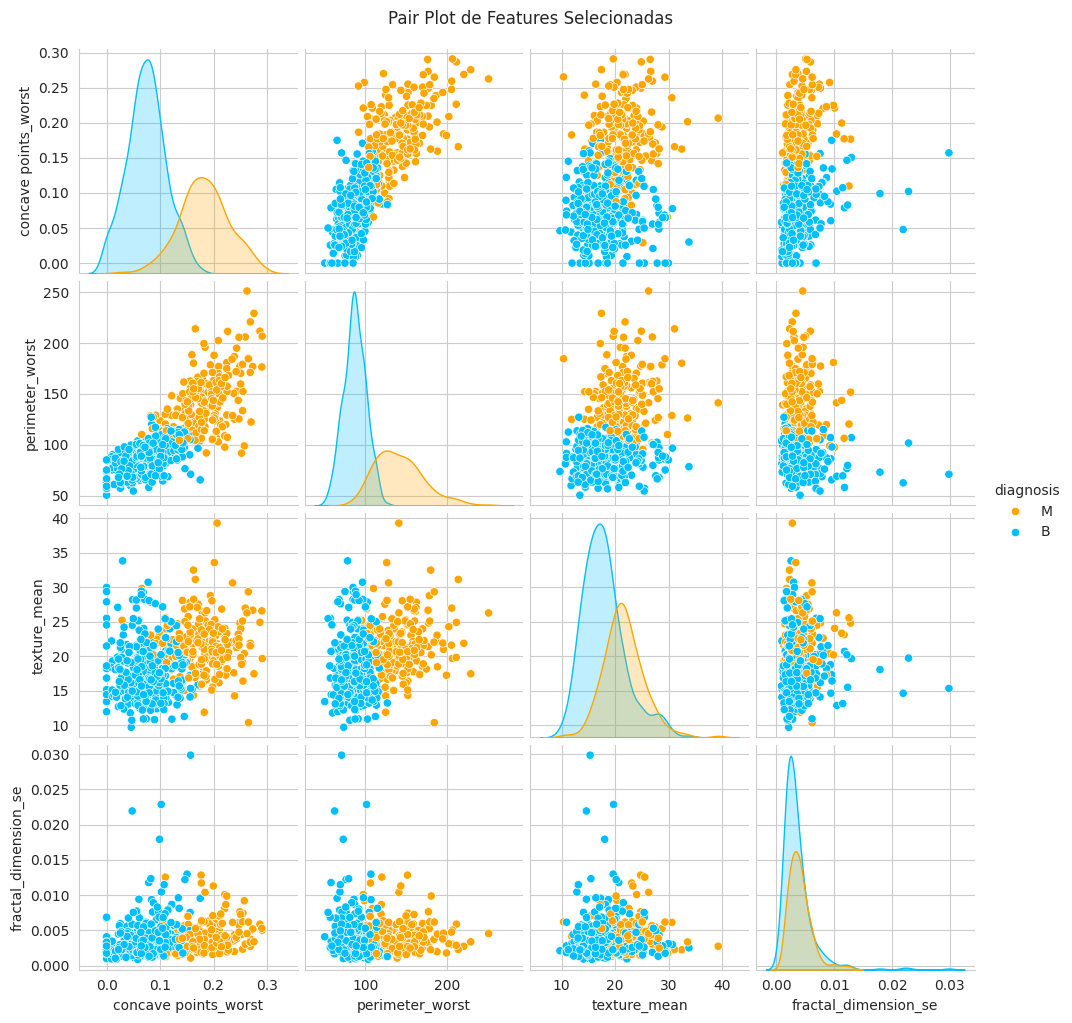

In [ ]:
# Selecionar um subconjunto estratégico de features
features_para_pairplot = [
    'diagnosis',
    'concave points_worst', # Preditror nº 1
    'perimeter_worst',    # Preditror nº 2
    'texture_mean',       # Preditror moderado
    'fractal_dimension_se'# Preditror fraco
]

# Criar o pairplot
sns.pairplot(
    dt[features_para_pairplot],
    hue='diagnosis',
    palette={'B': 'deepskyblue', 'M': 'orange'}
)
plt.suptitle('Pair Plot de Features Selecionadas', y=1.02)
plt.show()

1. concave points_worst vs perimeter_worst
- Forte separação entre benignos e malignos.
- Casos malignos tendem a ter valores mais altos em ambas as variáveis.
- Confirma o que vimos no heatmap de correlação: essas duas variáveis têm alta correlação com o diagnóstico.
2. texture_mean
- Distribuição mais sobreposta entre os dois grupos.
- Menor poder discriminativo isoladamente.
- Isso também foi observado nos histogramas e no heatmap (correlação mais fraca).
3. fractal_dimension_se
- Pouca separação entre os grupos.
- A maioria dos pontos se sobrepõe.
- Essa variável tem baixa correlação com o diagnóstico, como já identificado.

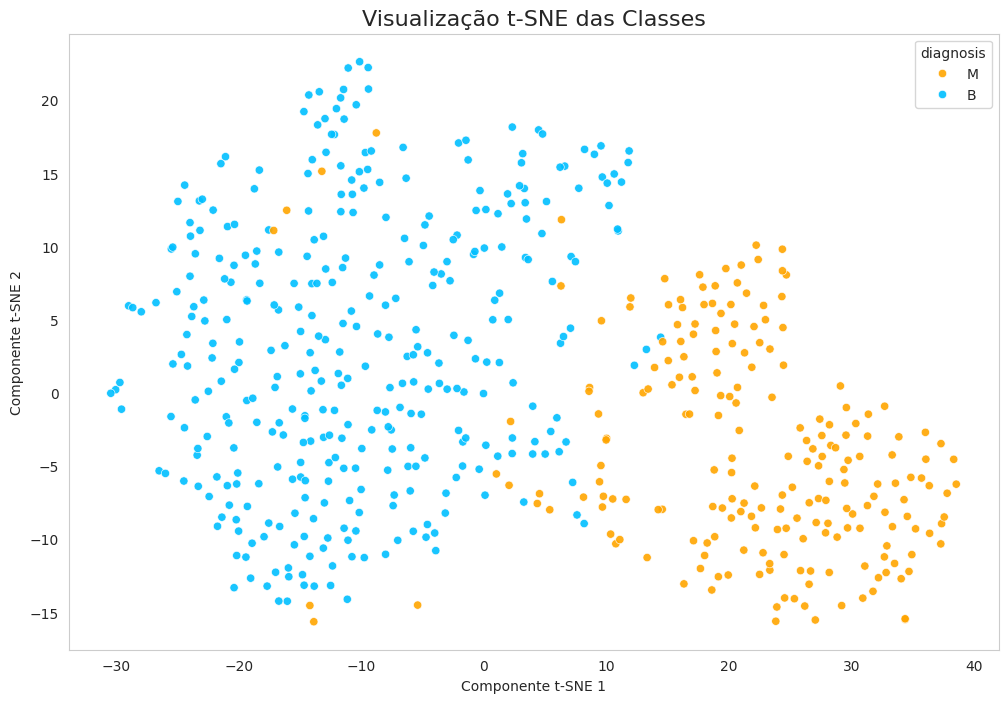

In [ ]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Assumindo que 'dt' é seu DataFrame original e 'X' e 'y' já foram separados
X = dt.drop(columns=['diagnosis'])
y = dt['diagnosis']

# 1. Escalonar os dados é um pré-requisito
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 2. Instanciar e aplicar o t-SNE
#    'perplexity' é o hiperparâmetro mais importante. Pense nele como o número
#    de vizinhos que cada ponto considera. Valores comuns estão entre 5 e 50.
#    'random_state' é crucial para a reprodutibilidade.
# Instancia o t-SNE sem o argumento n_iter para evitar erro de versão
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
tsne_components = tsne.fit_transform(X_scaled)

# 3. Criar um DataFrame para visualização
tsne_df = pd.DataFrame(data=tsne_components, columns=['TSNE1', 'TSNE2'])
tsne_df = pd.concat([tsne_df, y.reset_index(drop=True)], axis=1)

# 4. Visualizar o resultado
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x='TSNE1', y='TSNE2', hue='diagnosis', data=tsne_df,
    palette={'B': 'deepskyblue', 'M': 'orange'}, alpha=0.9
)
plt.title('Visualização t-SNE das Classes', fontsize=16)
plt.xlabel('Componente t-SNE 1')
plt.ylabel('Componente t-SNE 2')
plt.grid()
plt.show()

#### Interpretação
Este gráfico é uma visualização não-linear que "mapeia" a vizinhança de cada ponto de dados do espaço original de 30 dimensões para um plano 2D. A interpretação é inequívoca: os tumores Benignos (B) e Malignos (M) formam clusters extraordinariamente bem definidos e densos, com uma separação quase perfeita entre eles. Isso nos dá a maior confiança possível de que existe uma estrutura intrínseca e forte nos dados que diferencia as duas classes.

## Etapa 3: Pré-Processamento e Engenharia de Features

### Tarefa 3.1: Separar as features (X) e a variável alvo (y)

In [ ]:
# X recebe todas as colunas menos 'diagnosis'
X = dt.drop(columns=['diagnosis'])

# y recebe apenas a coluna 'diagnosis'
y = dt['diagnosis']

print(f"Features (X) separadas com sucesso! Shape: {X.shape}")
print(f"Variável alvo (y) separada com sucesso! Shape: {y.shape}")

Features (X) separadas com sucesso! Shape: (569, 31)
Variável alvo (y) separada com sucesso! Shape: (569,)


### Tarefa 3.2: Codificar a variável alvo (`diagnosis`) para formato numérico

In [ ]:
# Codificar a variável alvo 'diagnosis' para formato numérico
# Mapeia 'M' para 1 (maligno) e 'B' para 0 (benigno) e insere no dataframe

# Codifica a variável alvo 'diagnosis' para formato numérico e armazena em uma nova coluna
dt['diagnosis_num'] = dt['diagnosis'].map({'M': 1, 'B': 0})
print(f"Valores únicos em diagnosis_num: {dt['diagnosis_num'].unique()} (1=Maligno, 0=Benigno)")

# Exibe os primeiros valores codificados para conferência
print(f"Diagnóstico codificado (primeiros valores): {dt['diagnosis_num'].head().tolist()} (1=Maligno, 0=Benigno)")

dt.head()

Valores únicos em diagnosis_num: [1 0] (1=Maligno, 0=Benigno)
Diagnóstico codificado (primeiros valores): [1, 1, 1, 1, 1] (1=Maligno, 0=Benigno)


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,area_mean_log,diagnosis_num
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,6.909753,1
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,7.190676,1
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,7.093405,1
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,5.958683,1
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,7.168580,1


### Tarefa 3.3: Dividir os dados em conjuntos de treino e teste (usando `stratify`)

In [ ]:
# Seu código, que está 100% correto
from sklearn.model_selection import train_test_split

# Assumindo que X são as features e y_num é o alvo codificado
y_num = dt['diagnosis_num']

X_train, X_test, y_train, y_test = train_test_split(
    X, y_num,
    test_size=0.2,      # 20% dos dados para teste, 80% para treino
    random_state=42,    # Garante que a divisão seja sempre a mesma (reprodutibilidade)
    stratify=y_num      # A instrução para manter as proporções das classes
)

# A validação que prova que a estratificação funcionou
print("Proporção original de classes:")
print(y_num.value_counts(normalize=True).map('{:.2%}'.format))
print("-" * 30)
print("Proporção de classes no conjunto de TREINO:")
print(y_train.value_counts(normalize=True).map('{:.2%}'.format))
print("-" * 30)
print("Proporção de classes no conjunto de TESTE:")
print(y_test.value_counts(normalize=True).map('{:.2%}'.format))

Proporção original de classes:
diagnosis_num
0    62.74%
1    37.26%
Name: proportion, dtype: object
------------------------------
Proporção de classes no conjunto de TREINO:
diagnosis_num
0    62.64%
1    37.36%
Name: proportion, dtype: object
------------------------------
Proporção de classes no conjunto de TESTE:
diagnosis_num
0    63.16%
1    36.84%
Name: proportion, dtype: object


Ao dividir os dados, nosso objetivo é criar um conjunto de treino que seja uma boa representação do problema original e um conjunto de teste que sirva como uma avaliação justa e representativa do desempenho do modelo. Em um dataset desbalanceado, uma divisão puramente aleatória pode, por azar, criar conjuntos não representativos. O parâmetro stratify=y_num resolve isso forçando a divisão a manter a mesma proporção de classes (62.74% B / 37.26% M) tanto no conjunto de treino quanto no de teste.

### Tarefa 3.4: Escalonar as features numéricas (usando `StandardScaler`)

In [ ]:
from sklearn.preprocessing import StandardScaler

# Seu código original e correto
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Shape X_train escalonado: {X_train_scaled.shape}")
print(f"Shape X_test escalonado: {X_test_scaled.shape}\n")

# Verificação (opcional, mas muito instrutiva)
# A média de cada coluna em X_train_scaled deve ser muito próxima de 0.
print(f"Média de uma feature em X_train_scaled: {X_train_scaled[:, 0].mean():.4f}")

# O desvio padrão de cada coluna em X_train_scaled deve ser muito próximo de 1.
print(f"Desvio padrão de uma feature em X_train_scaled: {X_train_scaled[:, 0].std():.4f}")

Shape X_train escalonado: (455, 31)
Shape X_test escalonado: (114, 31)

Média de uma feature em X_train_scaled: -0.0000
Desvio padrão de uma feature em X_train_scaled: 1.0000


### Tarefa 3.5: Redução de Dimensionalidade (PCA para o Modelo 2)


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Assumindo que 'dt' é seu DataFrame original e limpo
# dt = pd.read_csv('data.csv')
# ...

# --- ETAPA 3 COMPLETA ---

# Tarefa 3.1: Separar as features (X) e a variável alvo (y)
X = dt.drop(columns=['diagnosis'])
y = dt['diagnosis']
print("--- 3.1: X e y Separados ---")
print(f"Shape de X: {X.shape}, Shape de y: {y.shape}\n")


# Tarefa 3.2: Codificar a variável alvo ('M' -> 1, 'B' -> 0)
y_num = y.map({'M': 1, 'B': 0})
print("--- 3.2: Alvo (y) Codificado ---")
print(y_num.value_counts(), "\n")


# Tarefa 3.3: Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y_num, test_size=0.2, random_state=42, stratify=y_num
)
print("--- 3.3: Dados Divididos em Treino e Teste ---")
print(f"Shape de X_train: {X_train.shape}, Shape de X_test: {X_test.shape}\n")


# Tarefa 3.4: Escalonar as features numéricas
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("--- 3.4: Features Escalonadas ---")
print("Dados prontos para o Modelo 1 (Baseline com 30 features)\n")


# Tarefa 3.5: Redução de Dimensionalidade (PCA para o Modelo 2)
# O PCA é aplicado nos dados JÁ ESCALONADOS
pca = PCA(n_components=10) # Exemplo: reduzindo para 10 componentes
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)
print("--- 3.5: Redução de Dimensionalidade com PCA ---")
print(f"Shape de X_train_pca: {X_train_pca.shape}, Shape de X_test_pca: {X_test_pca.shape}")
print("Dados prontos para o Modelo 2 (Experimento com 10 componentes PCA)\n")

--- 3.1: X e y Separados ---
Shape de X: (569, 32), Shape de y: (569,)

--- 3.2: Alvo (y) Codificado ---
diagnosis
0    357
1    212
Name: count, dtype: int64 

--- 3.3: Dados Divididos em Treino e Teste ---
Shape de X_train: (455, 32), Shape de X_test: (114, 32)

--- 3.4: Features Escalonadas ---
Dados prontos para o Modelo 1 (Baseline com 30 features)

--- 3.5: Redução de Dimensionalidade com PCA ---
Shape de X_train_pca: (455, 10), Shape de X_test_pca: (114, 10)
Dados prontos para o Modelo 2 (Experimento com 10 componentes PCA)



### Tarefa 3.5: Redução de Dimensionalidade (PCA para o Modelo 3 com 10 features)


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Assumindo que 'dt' é seu DataFrame original e limpo
# ...

# --- ETAPA 3 COMPLETA (VERSÃO REFINADA) ---

# Tarefa 3.1 e 3.2: Separar e Codificar
X = dt.drop(columns=['diagnosis'])
y = dt['diagnosis'].map({'M': 1, 'B': 0})

# Tarefa 3.3: Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print("--- 3.3: Dados Divididos em Treino e Teste ---")
print(f"Shape de X_train: {X_train.shape}, Shape de X_test: {X_test.shape}\n")


# Tarefa 3.4: Escalonar as features (para o Modelo 1 - Baseline)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("--- 3.4: Features Escalonadas ---")
print("Dados prontos para o Modelo 1 (Baseline com 30 features)\n")


# Tarefa 3.5: Abordagem Híbrida (Seleção + PCA) para o Modelo 2
print("--- 3.5: Implementando a Abordagem Híbrida (Seleção + PCA) ---")

# 3.5.1 - (FILTRO) Selecionar as 10 melhores features dos conjuntos de treino e teste
features_selecionadas = [
    'concave points_worst', 'perimeter_worst', 'concave points_mean', 'radius_worst',
    'perimeter_mean', 'area_worst', 'radius_mean', 'area_mean', 'concavity_mean',
    'concavity_worst'
]
X_train_selected = X_train[features_selecionadas]
X_test_selected = X_test[features_selecionadas]

# 3.5.2 - Escalonar APENAS as features selecionadas
scaler_hybrid = StandardScaler()
X_train_selected_scaled = scaler_hybrid.fit_transform(X_train_selected)
X_test_selected_scaled = scaler_hybrid.transform(X_test_selected)

# 3.5.3 - (CONDENSAÇÃO) Aplicar PCA nos dados selecionados e escalonados
# Usaremos o nome 'pca_hybrid' como você sugeriu
pca_hybrid = PCA(n_components=2)
X_train_pca_hybrid = pca_hybrid.fit_transform(X_train_selected_scaled)
X_test_pca_hybrid = pca_hybrid.transform(X_test_selected_scaled)

print(f"Shape de X_train_pca_hybrid: {X_train_pca_hybrid.shape}")
print("Dados prontos para o Modelo 2 (Experimento Híbrido com 2 componentes PCA)\n")

--- 3.3: Dados Divididos em Treino e Teste ---
Shape de X_train: (455, 32), Shape de X_test: (114, 32)

--- 3.4: Features Escalonadas ---
Dados prontos para o Modelo 1 (Baseline com 30 features)

--- 3.5: Implementando a Abordagem Híbrida (Seleção + PCA) ---
Shape de X_train_pca_hybrid: (455, 2)
Dados prontos para o Modelo 2 (Experimento Híbrido com 2 componentes PCA)



## Etapa 4: Modelagem e Treinamento

### Tarefa 4.1: Instanciar o modelo de baseline (Regressão Logística)

### Tarefa 4.2: Treinar o modelo com os dados de treino escalonados

## Etapa 5: Avaliação do Modelo e Análise de Resultados

### Tarefa 5.1: Realizar previsões com o conjunto de teste

### Tarefa 5.2: Calcular e analisar as métricas de classificação (Acurácia, Precisão, Recall, F1-Score, AUC)

### Tarefa 5.3: Gerar e visualizar a Matriz de Confusão

## Etapa 6: (Bônus) Experimento com Redução de Dimensionalidade (PCA)

### Tarefa 6.1: Aplicar PCA aos dados de treino e teste escalonados

### Tarefa 6.2: Treinar um novo modelo de Regressão Logística com os dados transformados pelo PCA

### Tarefa 6.3: Avaliar o modelo treinado com PCA (métricas e matriz de confusão)

### Tarefa 6.4: Comparar o desempenho do modelo com features completas vs. modelo com PCA

## Etapa 7: Conclusão e Próximos Passos

### Tarefa 7.1: Sumarizar os resultados e justificar a escolha do modelo final com base nas métricas (foco em Recall)

### Tarefa 7.2: Propor e documentar próximos passos para melhoria do modelo